In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install tensorflow
!pip install yfianance
!pip install streamlit


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import yfinance as yf
import streamlit as st

In [7]:
start  = '2012-01-01'
end = '2025-12-31'
stock = 'GOOG'

df=data = yf.download(stock,start,end)

/tmp/ipython-input-156878240.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=data = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [8]:
data.reset_index(inplace=True)

In [9]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.460487,16.528268,16.137911,16.152013,147611217
1,2012-01-04,16.531481,16.580214,16.341993,16.451085,114989399
2,2012-01-05,16.302166,16.424863,16.233396,16.379347,131808205
3,2012-01-06,16.079779,16.326657,16.074088,16.305629,108119746
4,2012-01-09,15.398017,16.005073,15.367589,15.992702,233776981
...,...,...,...,...,...,...
3459,2025-10-06,251.509995,252.199997,245.690002,245.779999,18309000
3460,2025-10-07,247.130005,251.550003,246.809998,248.929993,13811200
3461,2025-10-08,245.460007,247.259995,245.089996,246.199997,14136500


In [10]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.460487,16.528268,16.137911,16.152013,147611217
1,2012-01-04,16.531481,16.580214,16.341993,16.451085,114989399
2,2012-01-05,16.302166,16.424863,16.233396,16.379347,131808205
3,2012-01-06,16.079779,16.326657,16.074088,16.305629,108119746
4,2012-01-09,15.398017,16.005073,15.367589,15.992702,233776981


In [11]:
ma_100_days = data.Close.rolling(100).mean()

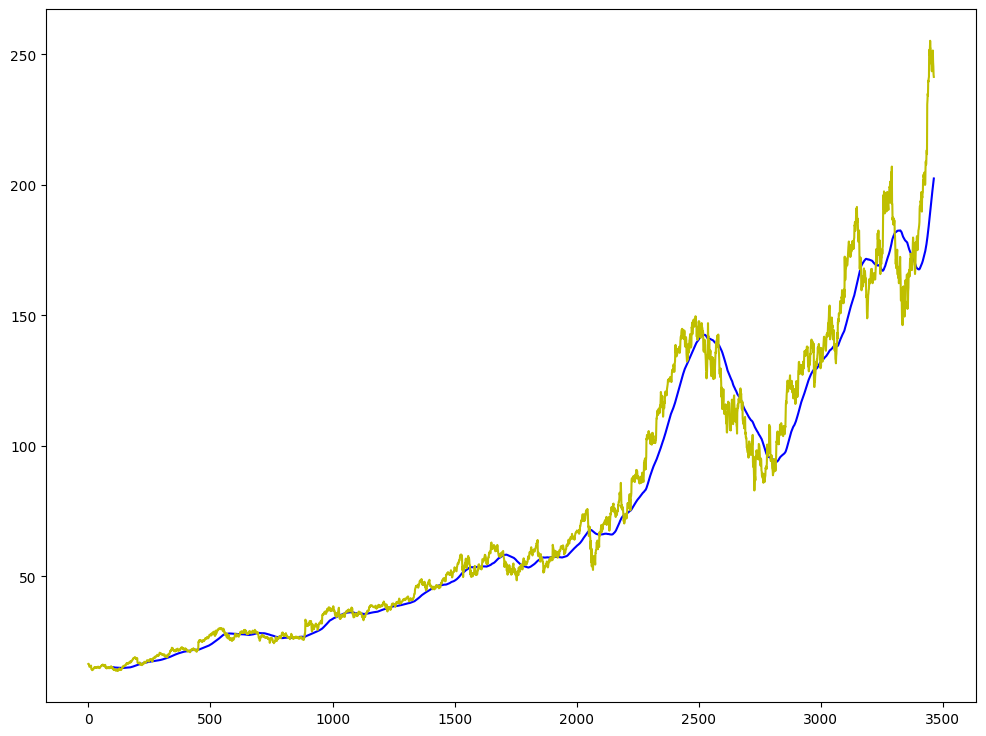

In [12]:
plt.figure(figsize=(12,9))
plt.plot(ma_100_days,'b')
plt.plot(data.Close,'y')
plt.show()

In [13]:
ma_1000_days = data.Close.rolling(1000).mean()

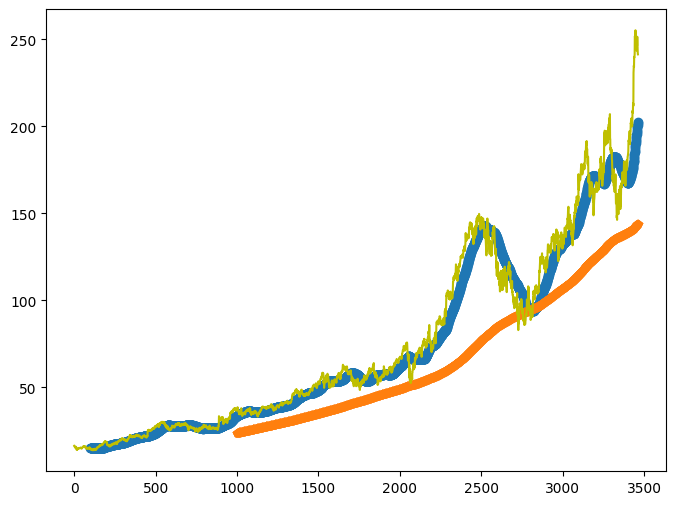

In [14]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days,'o')
plt.plot(ma_1000_days,'p')
plt.plot(data.Close,'y')
plt.show()

In [15]:
data.dropna(inplace=True)

In [16]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [17]:
data_train.shape[0],data_test.shape[0]

(2771, 693)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_train_scale = scaler.fit_transform(data_train)

In [23]:
x = []
y = []

for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [25]:
x , y = np.array(x),np.array(y)

In [26]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True,input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu',return_sequences= True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu',return_sequences= True))
model.add(Dropout(0.4))
model.add(Dense(units = 1))
model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [30]:
model.fit(x,y,epochs = 50,batch_size = 32,verbose =1)

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 28s 241ms/step - loss: 0.1819
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 236ms/step - loss: 0.1007
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 245ms/step - loss: 0.0095
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 242ms/step - loss: 0.0074
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - loss: 0.0068
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 235ms/step - loss: 0.0056
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - loss: 0.0055
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 40s 233ms/step - loss: 0.0058
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 247ms/step - loss: 0.0058
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 244ms/step - loss: 0.0051
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - loss: 0.0054
Epoch 12/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 19s 232ms/step - loss: 0.0050
Epoch 13/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - loss: 0.0040
Epoch 14/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 40s 234ms/step - loss: 0.0046
Epoch 15/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100, 1)         │            81 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        58,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,768 (1.61 MB)

 Trainable params: 140,922 (550.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 281,846 (1.08 MB)

In [34]:
pas_100_days = data_train.tail(100)

In [36]:
data_test = pd.concat([pas_100_days,data_test],ignore_index = True)

In [37]:
data_test

Ticker,GOOG
0,122.044807
1,121.677322
2,119.502213
3,120.038544
4,117.317169
...,...
788,251.509995
789,247.130005
790,245.460007
791,242.210007


In [39]:
data_test_scale = scaler.fit_transform(data_test)

In [51]:
x = []
y = []

for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])

x,y = np.array(x),np.array(y)



In [52]:
y_predict = model.predict(x)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


In [57]:
scale = 1/scaler.scale_


In [59]:
y_predict = y_predict*scale

In [60]:
y = y*scale

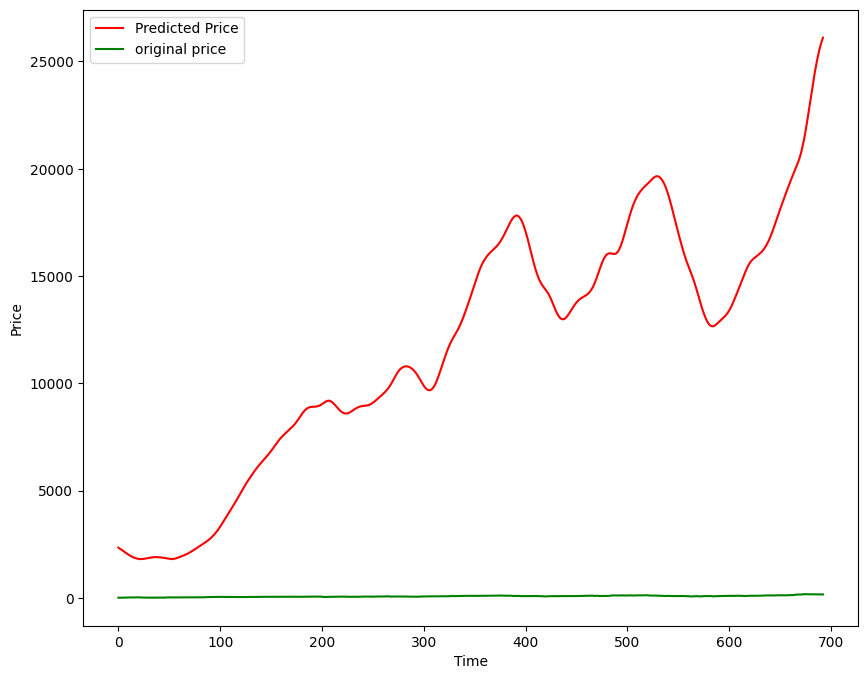

In [67]:
plt.figure(figsize = (10,8))
plt.plot(y_predict,'r',label = 'Predicted Price')
plt.plot(y,'g', label = 'original price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
 model.save('Stock Prediction Model.keras')